**Electric Vehicles Market Size Analysis**

Electric vehicles (EVs) are becoming increasingly popular due to environmental concerns and government incentives. Understanding the market size of EVs is important for manufacturers, policymakers, and investors. In this project, we analyze historical EV registration data to identify trends, estimate market growth, and forecast future registrations. The insights gained from this analysis can help stakeholders make informed decisions regarding production, infrastructure, and policies.

**Requirements**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
import joblib

**Data Import**

In [ ]:
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")


In [ ]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


**EDA (Exploratory Data Analysis)**

In [ ]:
df.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
177865,5YJ3E1EA8M,Pierce,Tacoma,WA,98422.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,27.0,211464683,POINT (-122.38578 47.28971),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305394e+10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [ ]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177861.000000,177866.000000,177866.000000,177866.000000,177477.000000,1.778660e+05,1.778610e+05
mean,98172.453506,2020.515512,58.842162,1073.109363,29.127481,2.202313e+08,5.297672e+10
std,2442.450668,2.989384,91.981298,8358.624956,14.892169,7.584987e+07,1.578047e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.814743e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282522e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548445e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [ ]:
df.isnull().sum()

,0
VIN (1-10),0
County,5
City,5
State,0
Postal Code,5
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
df.shape

(177866, 17)

**Handle Null Values**

In [ ]:
df = df.dropna(subset=['County', 'City', 'Postal Code', 'Vehicle Location', 'Electric Utility', '2020 Census Tract'])

In [ ]:
df['Legislative District'] = df['Legislative District'].fillna(0)  # veya 'Unknown'

In [ ]:
df.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


**Data Visualization**

In [ ]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,6)
palette = sns.color_palette("viridis", 10)

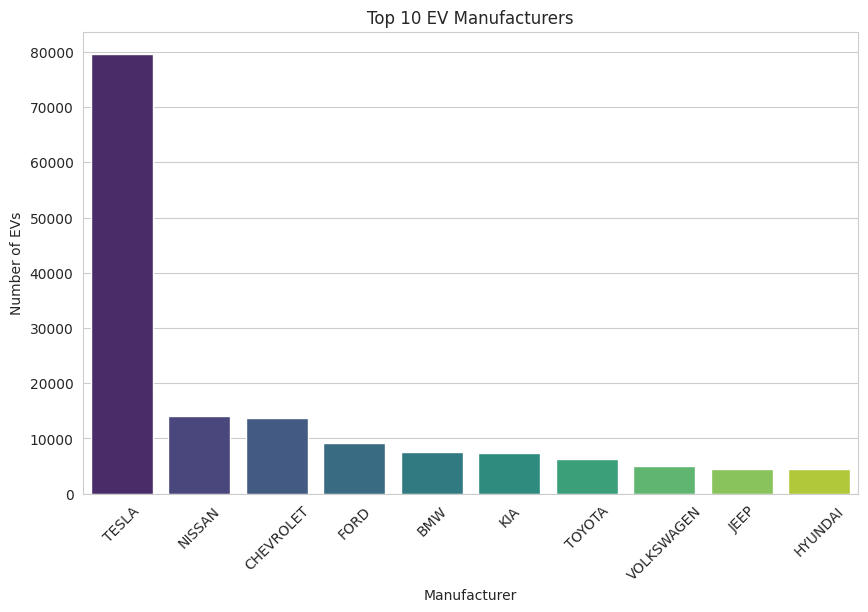

In [ ]:
top_makes = df['Make'].value_counts().head(10)
sns.barplot(x=top_makes.index, y=top_makes.values, palette=palette)
plt.title("Top 10 EV Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Number of EVs")
plt.xticks(rotation=45)
plt.show()

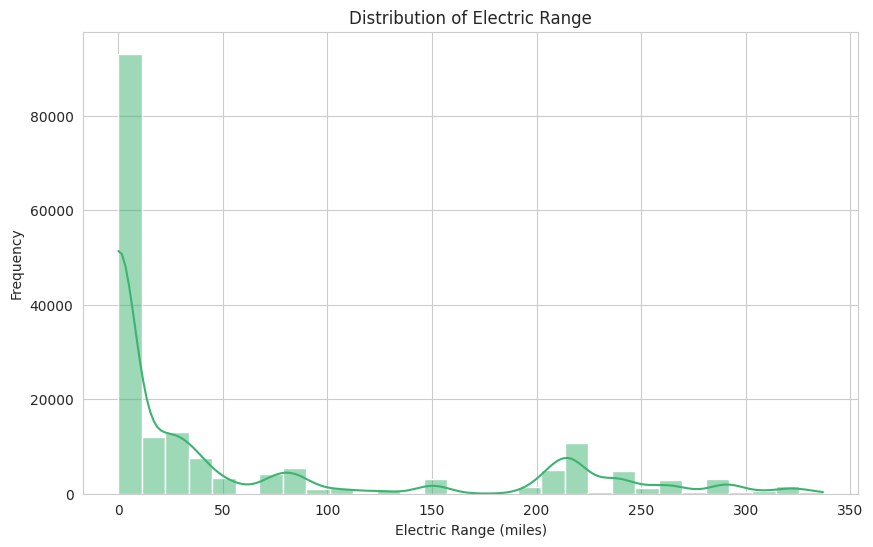

In [ ]:
sns.histplot(df['Electric Range'], bins=30, kde=True, color='mediumseagreen')
plt.title("Distribution of Electric Range")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Top 3 Makes
top_makes_list = df['Make'].value_counts().head(3).index.tolist()

# Top Models in Top 3 Makes
top_models = df[df['Make'].isin(top_makes_list)].groupby(['Make', 'Model']).size().reset_index(name='Number of Vehicles')
top_models = top_models.sort_values(by='Number of Vehicles', ascending=False).head(10)

# Top 10 Models by Average Electric Range in Top Makes
top_range_models = df[df['Make'].isin(top_makes_list)].groupby(['Make', 'Model'])['Electric Range'].mean().reset_index()
top_range_models = top_range_models.sort_values(by='Electric Range', ascending=False).head(10)


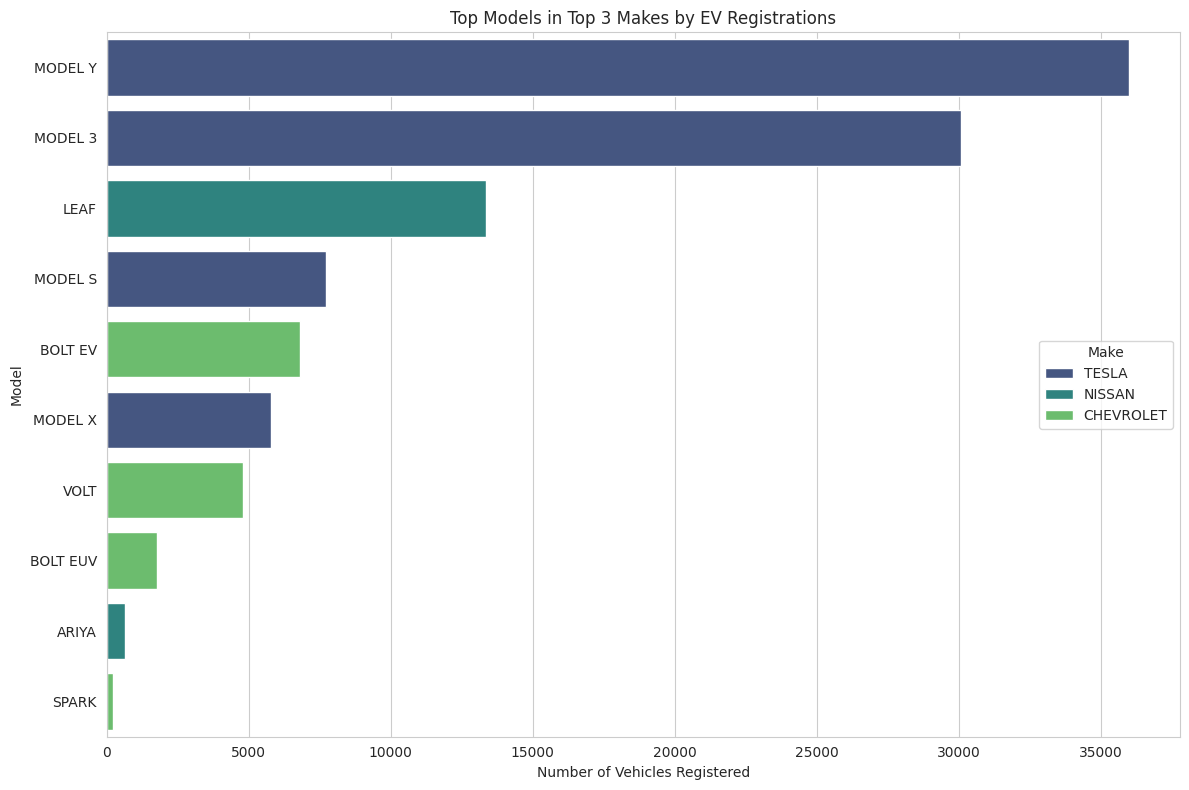

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

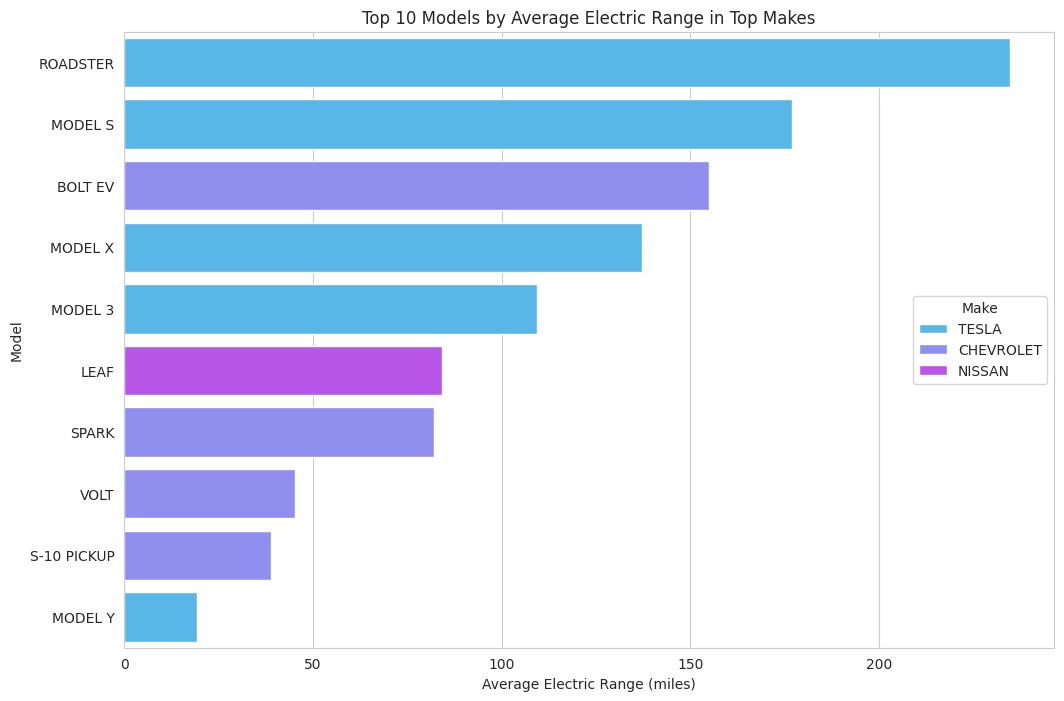

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

**Selecting the Best Predictive Model**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxp9lqzut/eifq00nv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxp9lqzut/s7ns64dr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94276', 'data', 'file=/tmp/tmpxp9lqzut/eifq00nv.json', 'init=/tmp/tmpxp9lqzut/s7ns64dr.json', 'output', 'file=/tmp/tmpxp9lqzut/prophet_modeli9ghihfs/prophet_model-20250909163153.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:31:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:31:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


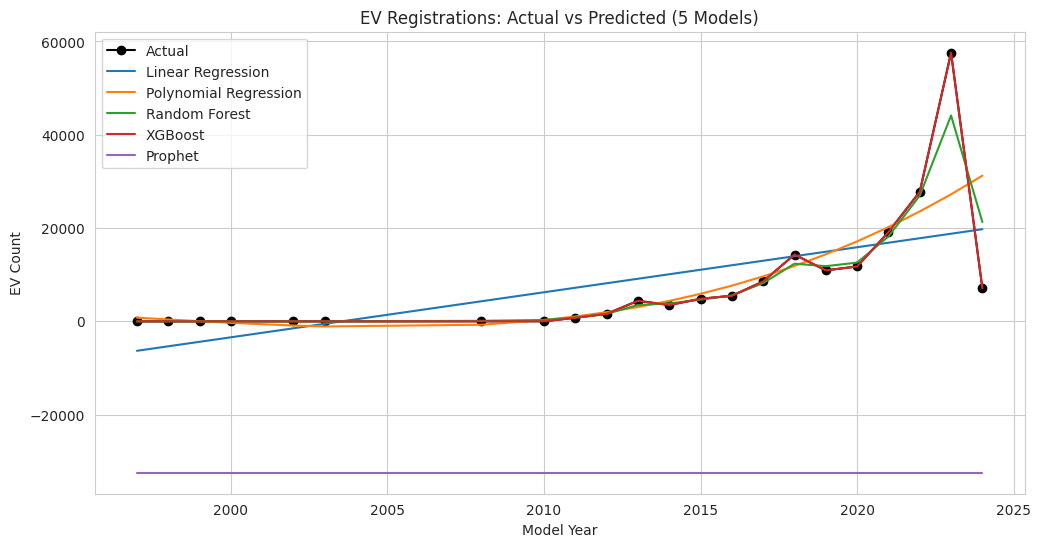

In [ ]:
ev_yearly = df.groupby('Model Year').size().reset_index(name='EV Count')

X = ev_yearly['Model Year'].values.reshape(-1,1)
y = ev_yearly['EV Count'].values

# 1. Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
y_lr = lr.predict(X)

# 2. Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly.fit(X, y)
y_poly = poly.predict(X)

# 3. Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X, y)
y_rf = rf.predict(X)

# 4. XGBoost Regressor
import xgboost as xgb
xgbr = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, random_state=42)
xgbr.fit(X, y)
y_xgb = xgbr.predict(X)

# 5. Prophet
from prophet import Prophet
df_prophet = ev_yearly.rename(columns={'Model Year':'ds', 'EV Count':'y'})
prophet_model = Prophet(yearly_seasonality=False, daily_seasonality=False)
prophet_model.fit(df_prophet)
future = prophet_model.make_future_dataframe(periods=3, freq='Y')
forecast = prophet_model.predict(future)
y_prophet = forecast['yhat'][:len(ev_yearly)]

rmse_lr = np.sqrt(mean_squared_error(y, y_lr))
rmse_poly = np.sqrt(mean_squared_error(y, y_poly))
rmse_rf = np.sqrt(mean_squared_error(y, y_rf))
rmse_xgb = np.sqrt(mean_squared_error(y, y_xgb))
rmse_prophet = np.sqrt(mean_squared_error(y, y_prophet))

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression', 'Random Forest', 'XGBoost', 'Prophet'],
    'RMSE': [rmse_lr, rmse_poly, rmse_rf, rmse_xgb, rmse_prophet]
}).sort_values(by='RMSE')

results

plt.figure(figsize=(12,6))
plt.plot(ev_yearly['Model Year'], y, marker='o', label='Actual', color='black')
plt.plot(ev_yearly['Model Year'], y_lr, label='Linear Regression')
plt.plot(ev_yearly['Model Year'], y_poly, label='Polynomial Regression')
plt.plot(ev_yearly['Model Year'], y_rf, label='Random Forest')
plt.plot(ev_yearly['Model Year'], y_xgb, label='XGBoost')
plt.plot(ev_yearly['Model Year'], y_prophet, label='Prophet')
plt.xlabel('Model Year')
plt.ylabel('EV Count')
plt.title('EV Registrations: Actual vs Predicted (5 Models)')
plt.legend()
plt.show()


,Model,RMSE
3,XGBoost,0.003015
2,Random Forest,4218.154032
1,Polynomial Regression,8483.548040
0,Linear Regression,10030.234473
4,Prophet,42542.492606


**Forecast Using XGBoost**

In [ ]:
xgbr_best = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, random_state=42)
xgbr_best.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
future_years = np.array([2025, 2026, 2027]).reshape(-1,1)
future_pred = xgbr_best.predict(future_years)

In [ ]:
future_df = pd.DataFrame({'Model Year': future_years.flatten(), 'Predicted EV Count': future_pred})
print(future_df)

   Model Year  Predicted EV Count
0        2025         7080.001465
1        2026         7080.001465
2        2027         7080.001465


In [ ]:
joblib.dump(xgbr_best, "xgboost_ev_model.pkl")

['xgboost_ev_model.pkl']

**Conclusion**

In this project, we analyzed historical EV registration data in the United States to understand market trends and forecast future growth. Five predictive models—Linear Regression, Polynomial Regression, Random Forest, XGBoost, and Prophet—were evaluated, and XGBoost achieved the lowest RMSE, making it the most accurate model. Using XGBoost, we predicted EV registrations for upcoming years, providing valuable insights for manufacturers, policymakers, and stakeholders to support strategic planning and market expansion.